In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image, display, clear_output

path1= "..\\importantScenes\\kozansonIR3.png"
img1=cv2.imread(path1,cv2.IMREAD_GRAYSCALE)

path2= "..\\importantScenes\\output_frames\\frame_23.jpg"
img2=cv2.imread(path2,cv2.IMREAD_GRAYSCALE)

path3= "..\\importantScenes\\output_frames\\frame_17.jpg"
img3=cv2.imread(path3,cv2.IMREAD_GRAYSCALE)

path4= "..\\importantScenes\\output_frames\\frame_18.jpg"
img4=cv2.imread(path4,cv2.IMREAD_GRAYSCALE)

path5= "..\\importantScenes\\output_frames\\frame_19.jpg"
img5=cv2.imread(path5,cv2.IMREAD_GRAYSCALE)

path6= "..\\importantScenes\\output_frames\\frame_20.jpg"
img6=cv2.imread(path6,cv2.IMREAD_GRAYSCALE)

path7= "..\\importantScenes\\output_frames\\frame_21.jpg"
img7=cv2.imread(path7,cv2.IMREAD_GRAYSCALE)

imgs2search=[img2,img3,img4,img5,img6,img7]



In [2]:

# Display image for ROI selection
roi = cv2.selectROI("Select ROI", cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR))
cv2.destroyAllWindows()

# Extract ROI coordinates
x, y, w, h = roi  # Top-left corner (x, y) and width, height
print(f"ROI coordinates: x={x}, y={y}, w={w}, h={h}")

#Helper tool to selec roi
#ROI coordinates: x=364, y=262, w=169, h=195

ROI coordinates: x=357, y=243, w=171, h=219


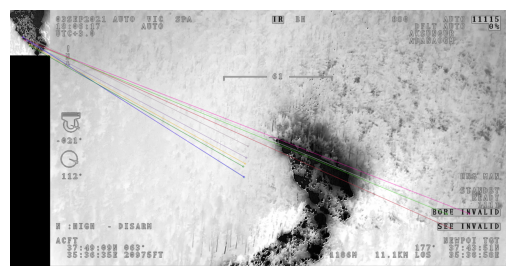

In [11]:

# Define ROI
x, y, w, h = 357, 243, 171, 219  # Example ROI coordinates
roi = img1[y:y+h, x:x+w]

# Initialize feature detector
orb = cv2.ORB_create()

# Detect and compute features
kp1, des1 = orb.detectAndCompute(roi, None)

for img in imgs2search:
    kp2, des2 = orb.detectAndCompute(img, None)


    # Match features using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw matches
    result = cv2.drawMatches(roi, kp1, img2, kp2, matches[:10], None, flags=2)

    # Show result
    plt.imshow( result)
    plt.axis('off')  # Hide axes
    plt.show()
    input("enter to skip")
    clear_output(wait=True) 




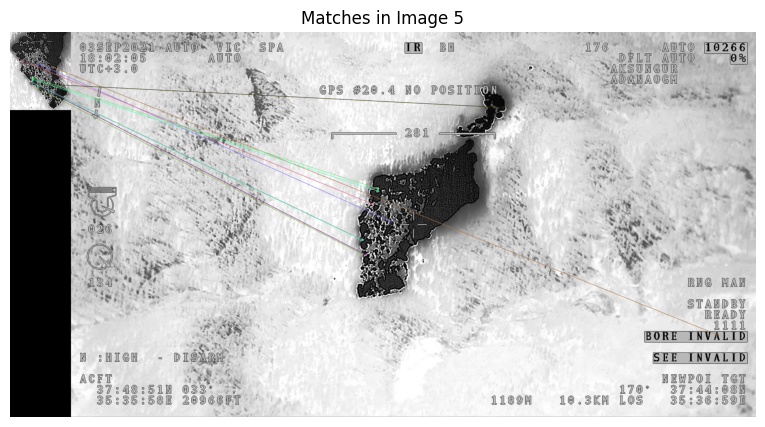

In [4]:

# Define ROI
x, y, w, h = 357, 243, 171, 219  # Example ROI coordinates
roi = img1[y:y+h, x:x+w]

# Initialize feature detector
orb = cv2.ORB_create(nfeatures=3000)  # Increase features if needed

# Detect and compute features in the ROI
kp1, des1 = orb.detectAndCompute(roi, None)

# Ensure descriptors exist for ROI
if des1 is None:
    print("No features detected in the ROI. Exiting.")
else:
    for i, img in enumerate(imgs2search):
        kp2, des2 = orb.detectAndCompute(img, None)

        # Check if descriptors exist for the current image
        if des2 is None:
            print(f"No features detected in image {i}. Skipping.")
            continue

        # Match features using BFMatcher
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(des1, des2)

        # Sort matches by distance
        matches = sorted(matches, key=lambda x: x.distance)

        # Apply a minimum number of matches threshold
        if len(matches) < 10:
            print(f"Few matches ({len(matches)}) found in image {i}. Skipping.")
            continue

        # Draw matches
        result = cv2.drawMatches(roi, kp1, img, kp2, matches[:10], None, flags=2)

        # Display result
        plt.figure(figsize=(10, 5))
        plt.imshow(result)
        plt.title(f"Matches in Image {i}")
        plt.axis('off')  # Hide axes
        plt.show()

        input("Press Enter to continue...")
        clear_output(wait=True)
